In [12]:
import datasets
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
cache_dir="./data/hf_cache"
ds_all = datasets.load_dataset("detection-datasets/coco", cache_dir=cache_dir)

In [3]:
ds_all

DatasetDict({
    train: Dataset({
        features: ['image', 'name'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['image', 'name'],
        num_rows: 1000
    })
})

In [7]:
image = ds_all["train"]["image"][0]
print(image)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x480 at 0x7882D8B923B0>


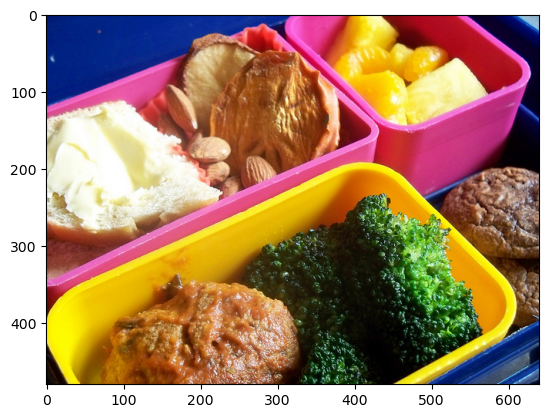

In [14]:
plt.imshow(image)

In [13]:
image_np = np.array(image)
print("Image shape:", image_np.shape)

Image shape: (480, 640, 3)


In [6]:
label_feature = ds_all["train"].features["label"]
n_classes = label_feature.num_classes
print(f"Número de clases: {n_classes}")

Número de clases: 100


In [18]:
ds_all['train'][0]['image']

TypeError: Unexpected type <class 'list'>

In [19]:
from torchvision import transforms

IMG_SIZE = 224

# Define transformations for the images
# These are typical transforms for training deep learning models
transform = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # Normalization parameters for ImageNet (standard for most timm models)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [20]:
# Function to apply the transforms to the image column
def apply_transforms(examples):
    # The 'examples' dictionary contains 'image' (PIL Image) and 'label'
    examples['image'] = [transform(img.convert('RGB')) for img in examples['image']]
    return examples

# Set the transform function
# batch_size=16 is used internally by set_transform for efficiency
ds_all.set_transform(apply_transforms, columns=['image'], output_all_columns=True)

In [22]:
BATCH_SIZE = 32

# Create the DataLoader
dataloader = DataLoader(
    ds_all['train'],
    batch_size=BATCH_SIZE,
    shuffle=True,          # Shuffle data for training
    num_workers=4,         # Use multiple processes for faster loading (adjust based on your system)
    pin_memory=True        # Speeds up host to GPU data transfer
)

next(iter(dataloader))

/home/sguajardo/miniconda3/envs/image_dl/lib/python3.10/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'image': tensor([[[[-0.4054, -0.5253, -0.5253,  ..., -0.5424, -0.5253, -0.5596],
           [-0.4568, -0.5253, -0.4568,  ..., -0.5596, -0.5596, -0.6452],
           [-0.5424, -0.5253, -0.5424,  ..., -0.5938, -0.6965, -0.7137],
           ...,
           [-0.5938, -0.5253, -0.5253,  ..., -0.0458, -0.1486, -0.1314],
           [-0.5767, -0.6281, -0.5938,  ..., -0.1486, -0.1143, -0.0801],
           [-0.6109, -0.6281, -0.5938,  ..., -0.2684, -0.1657, -0.1657]],
 
          [[-1.3880, -1.4405, -1.4230,  ..., -1.3880, -1.4055, -1.4230],
           [-1.4405, -1.4055, -1.4405,  ..., -1.4230, -1.4405, -1.4055],
           [-1.4405, -1.3880, -1.4755,  ..., -1.4230, -1.4405, -1.4230],
           ...,
           [-1.3004, -1.2304, -1.2129,  ..., -1.0728, -1.1078, -1.1253],
           [-1.2654, -1.2829, -1.2129,  ..., -1.1429, -1.1078, -1.0903],
           [-1.3004, -1.3179, -1.2654,  ..., -1.1429, -1.1253, -1.1604]],
 
          [[-1.7522, -1.7870, -1.7696,  ..., -1.7696, -1.7522, -1.7696],
    